In [1]:
import numpy as np

%reload_ext autoreload
%autoreload 2

Text(0.5, 1.0, 'data by make_classification()')

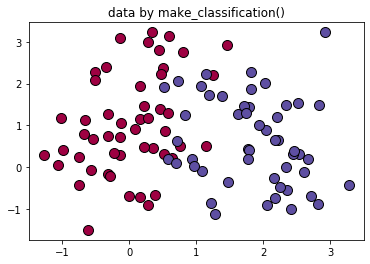

In [41]:
# 使用 sklearn 生成模拟的二分类数据集进行模型训练和测试
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_classification

X, labels = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

unique_lables = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_lables)))

for k, col in zip(unique_lables, colors):
    x_k = X[labels == k]
    plt.plot(x_k[:, 0], x_k[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)

plt.title('data by make_classification()')
plt.show()

In [43]:
# 对数据进行简单的训练集与测试集的划分
offset = int(X.shape[0] * 0.85)
X_train, y_train = X[:offset], labels[:offset]
X_test, y_test = X[offset:], labels[offset:]

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

print('X_train=', X_train.shape)
print('X_test=', X_test.shape)
print('y_train=', y_train.shape)
print('y_test=', y_test.shape)

X_train= (85, 2)
X_test= (15, 2)
y_train= (85, 1)
y_test= (15, 1)


In [44]:
import LogisticRegression

# 对训练集进行训练
lr = LogisticRegression.LogisticRegression()
loss_list, params, grads = lr.logistic_train(X_train, y_train, 0.01, 1000)

epoch 100 loss 0.551657
epoch 200 loss 0.476187
epoch 300 loss 0.429134
epoch 400 loss 0.396606
epoch 500 loss 0.372557
epoch 600 loss 0.353918
epoch 700 loss 0.338956
epoch 800 loss 0.326620
epoch 900 loss 0.316234


In [46]:
# 预测
y_train_pred = lr.predict(X_train, params)
y_test_pred = lr.predict(X_test, params)

# 准确率
accuracy_score_train = lr.accuracy(y_train, y_train_pred)
accuracy_score_test = lr.accuracy(y_test, y_test_pred)
print(accuracy_score_train)
print(accuracy_score_test)

0.8823529411764706
0.9333333333333333


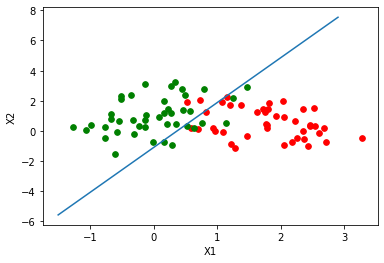

In [47]:
# 可视化展示
def plot_logistic(X_train, y_train, params):
    n = X_train.shape[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []    
    for i in range(n):        
        if y_train[i] == 1:
            xcord1.append(X_train[i][0])
            ycord1.append(X_train[i][1])        
        else:
            xcord2.append(X_train[i][0])
            ycord2.append(X_train[i][1])
        
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1,s=32, c='red')
    ax.scatter(xcord2, ycord2, s=32, c='green')
    x = np.arange(-1.5, 3, 0.1)
    y = (-params['b'] - params['w'][0] * x) / params['w'][1]
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

plot_logistic(X_train, y_train, params)